In [1]:
import pandas as pd
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import os

In [2]:
mu_c=np.loadtxt("Fig12_left_muc.txt")
mu_c_err=np.loadtxt("Fig12_left_mucerr.txt")

In [3]:
def inv_vol(a):
    b=[0,0,0,0,0]
    for i in range(len(a)):
        b[i]=1.0/a[i]**3
    return b

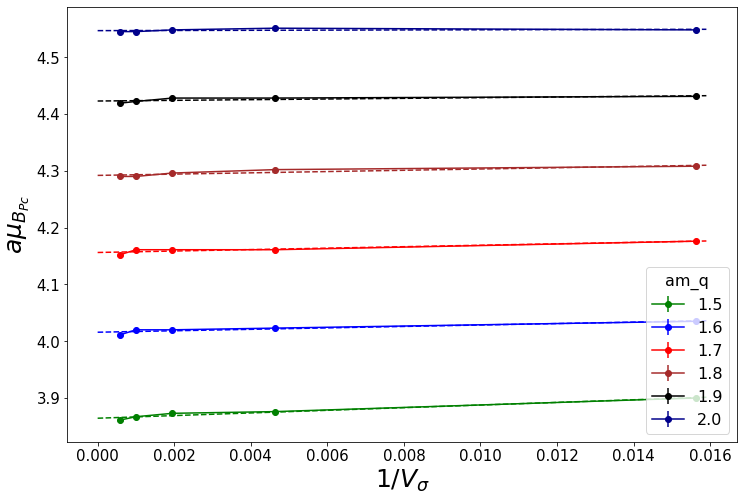

In [4]:
mq1=['1.5','1.6','1.7','1.8','1.9','2.0']
vol1=[4,6,8,10,12]
col=['green','blue','red','brown','black','darkblue']
plt.figure(figsize=(12,8))
m=[0,0,0,0,0,0]
b=[0,0,0,0,0,0]
for i in range(len(mq1)):
    x=pd.Series(inv_vol(vol1))
    y=pd.Series(mu_c[i]).mul(3)
    yerrr=pd.Series(mu_c_err[i]).mul(3)
    plt.errorbar(x,y,yerrr,linestyle="-", fmt="o",label=mq1[i],color=col[i])
    m[i],b[i] = np.polyfit(x, y, 1)
    extra=np.arange(0,0.016,0.0001)
    plt.plot(extra,m[i]*extra+b[i],linestyle='--',color=col[i])
plt.xlabel(r"$1/V_{\sigma}$",fontsize=25)
plt.ylabel(r"$a\mu_{B_{Pc}}$",fontsize=25)
plt.legend(title="am_q",fontsize=16,title_fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()